In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
trades = pd.read_csv("C:/Users/Jivan Gude/Desktop/jivan_gude/csv_files/hyperliquid.csv")
sentiment = pd.read_csv("C:/Users/Jivan Gude/Desktop/jivan_gude/csv_files/fear_greed_index.csv")

In [22]:
#find missing values
trades.isna().sum()
sentiment.isna().sum()

timestamp         0
value             0
classification    0
date              0
dtype: int64

In [50]:
# trades.columns=[c.strip().lower().replace(" ","_")for c in trades.columns]  #Clean columns name
# trades['timestamp_ist']=pd.to_datetime(trades['timestamp_ist'],format="%d-%m-%Y %H:%M",errors='coerce')   # 2) Fix Timestamp (DD-MM-YYYY format)

# 3) If second timestamp exists, convert it too
# if 'timestamp' in trades.columns:
    # trades['timestamp']=pd.to_datetime(trades['timestamp'],errors='coerce')


# 4) Create trade_date
# trades['trade_date']=trades['timestamp_ist'].dt.date

# 5) Convert numeric columns properly
# numeric_cols = [
#     'execution_price', 'size_tokens', 'size_usd', 
#     'start_position', 'closed_pnl', 'fee'
# ]
# for col in numeric_cols:
#     trades[col] = pd.to_numeric(trades[col], errors='coerce')


# 6) Clean direction values
# trades['direction']=trades['direction'].str.strip().str.lower()
# trades['direction']=trades['direction'].replace({
#     'buy':'buy',
#     'sell':'sell',
#     'close long': 'close_long',
#     'close short': 'close_short'
# })


# 7) Profit flag + absolute pnl
# trades['profit_flag'] = trades['closed_pnl'] > 0
# trades['abs_pnl'] = trades['closed_pnl'].abs()
# trades  


# trades['notional'] = trades['execution_price'] * trades['size_tokens']


# 9) Remove useless or duplicate columns
drop_cols = ['order_id', 'trade_id']
trades.drop(columns=[c for c in drop_cols if c in trades.columns], inplace=True)
trades.head(20)

,account,coin,execution_price,size_tokens,size_usd,side,timestamp_ist,start_position,direction,closed_pnl,transaction_hash,crossed,fee,timestamp,trade_date,profit_flag,abs_pnl,notional
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,True,0.345404,1970-01-01 00:28:50,2024-12-02,False,0.0,7872.163303
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,True,0.005600,1970-01-01 00:28:50,2024-12-02,False,0.0,127.680000
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,True,0.050431,1970-01-01 00:28:50,2024-12-02,False,0.0,1150.630695
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,True,0.050043,1970-01-01 00:28:50,2024-12-02,False,0.0,1142.038452
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,True,0.003055,1970-01-01 00:28:50,2024-12-02,False,0.0,69.747462
5,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9900,1.41,11.27,BUY,2024-12-02 22:50:00,1298.215466,buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,True,0.000493,1970-01-01 00:28:50,2024-12-02,False,0.0,11.265900
6,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9934,144.09,1151.77,BUY,2024-12-02 22:50:00,1299.624972,buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,True,0.050431,1970-01-01 00:28:50,2024-12-02,False,0.0,1151.769006
7,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,8.0000,34.00,272.00,BUY,2024-12-02 22:50:00,1443.664541,buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,True,0.011900,1970-01-01 00:28:50,2024-12-02,False,0.0,272.000000
8,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,8.0000,46.00,368.00,BUY,2024-12-02 22:50:00,1477.652641,buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,True,0.016100,1970-01-01 00:28:50,2024-12-02,False,0.0,368.000000
9,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,8.0000,12.50,100.00,BUY,2024-12-02 22:50:00,1523.636541,buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,True,0.004375,1970-01-01 00:28:50,2024-12-02,False,0.0,100.000000


In [63]:
# # Fix IST timestamp (DD-MM-YYYY)
# trades['timestamp_ist'] = pd.to_datetime(
#     trades['timestamp_ist'],
#     format="%d-%m-%Y %H:%M",
#     errors='coerce'
# )

# # FIX: convert UNIX timestamp (in milliseconds) → proper date
# if 'timestamp' in trades.columns:
#     trades['timestamp'] = pd.to_datetime(
#         trades['timestamp'],
#         unit='ms',      # <-- THIS IS THE FIX
#         errors='coerce'
#     )
# trades

# trades['trade_date'] = trades['timestamp_ist'].dt.date
# num_cols = ['execution_price', 'size_tokens', 'size_usd', 
#             'start_position', 'closed_pnl', 'fee']

# for col in num_cols:
#     trades[col] = pd.to_numeric(trades[col], errors='coerce')

# trades['direction'] = trades['direction'].str.lower().str.replace(" ", "_")

# trades['profit_flag'] = trades['closed_pnl'] > 0
# trades['abs_pnl'] = trades['closed_pnl'].abs()
# trades['notional'] = trades['execution_price'] * trades['size_tokens']

# drop_cols = ['order_id', 'trade_id','transaction_hash']
# trades.drop(columns=[c for c in drop_cols if c in trades.columns], inplace=True)
# trades


# --------- CLEAN COIN COLUMN ----------
# Remove unwanted symbols like @107, @xyz from coin name
# trades['coin'] = trades['coin'].astype(str).str.replace("@", "", regex=False)
# trades['coin'] = trades['coin'].str.replace(r'\d+', '', regex=True)
# trades['coin'] = trades['coin'].str.strip().str.upper()

# Fix UNIX timestamp (milliseconds)
trades['timestamp'] = pd.to_numeric(trades['timestamp'], errors='coerce')

trades['timestamp'] = pd.to_datetime(
    trades['timestamp'], 
    unit='ms',        # ← Correct conversion
    errors='coerce'
)

trades
sentiment


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05
...,...,...,...,...
2639,1745818200,54,Neutral,2025-04-28
2640,1745904600,60,Greed,2025-04-29
2641,1745991000,56,Greed,2025-04-30
2642,1746077400,53,Neutral,2025-05-01


In [70]:
# Convert Date column
# sentiment['date'] = pd.to_datetime(sentiment['date'], errors='coerce')

# Rename to match trades dataframe
# sentiment.rename(columns={'date': 'trade_date'}, inplace=True)

# # Convert to only date (no time)
# sentiment['trade_date'] = sentiment['trade_date'].dt.date

sentiment.head()


,timestamp,value,classification,trade_date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [72]:
# Daily Aggregation
daily = trades.groupby('trade_date').agg(
    total_volume = ('size_tokens', 'sum'),
    total_usd_volume = ('size_usd', 'sum'),
    number_of_trades = ('size_tokens', 'count'),
    avg_execution_price = ('execution_price', 'mean'),
    avg_start_position = ('start_position', 'mean'),
    avg_fee = ('fee', 'mean'),
    total_pnl = ('closed_pnl', 'sum'),
    win_rate = ('profit_flag', 'mean'),
    avg_notional = ('notional', 'mean'),
).reset_index()

daily.head(20)


,trade_date,total_volume,total_usd_volume,number_of_trades,avg_execution_price,avg_start_position,avg_fee,total_pnl,win_rate,avg_notional
0,2023-05-01,0.25130,477.00,3,1898.133333,0.091933,0.000000,0.000000,0.000000,158.997603
1,2023-12-05,11.80901,50005.83,9,11038.300000,2.513867,1.389051,0.000000,0.000000,5556.203241
2,2023-12-14,4092.28901,113203.35,11,8031.868818,-132.574302,2.572803,-205.434737,0.363636,10291.213225
3,2023-12-15,3558.00000,10609.95,2,2.982000,-2440.000000,1.326245,-24.632034,0.000000,5304.978000
4,2023-12-16,39897.00000,15348.77,3,0.384707,12124.666667,1.279063,0.000000,0.000000,5116.253793
5,2023-12-17,86246.44860,116278.02,14,802.541859,10738.717443,2.076393,304.982785,0.500000,8305.572720
6,2023-12-18,14.30600,31164.18,2,2178.100000,0.004000,3.895523,0.000000,0.000000,15582.092800
7,2023-12-19,161546.30600,91602.41,15,447.801911,27078.305640,1.526706,1000.538612,0.666667,6106.827493
8,2023-12-20,174520.20000,141636.79,18,6.722872,20047.266667,1.967177,162.732282,0.444444,7868.710157
9,2023-12-21,1364.30000,125233.97,49,91.840204,121.777143,0.638948,537.211402,0.530612,2555.795491


In [73]:
direction_summary = trades.groupby(['trade_date', 'direction']).size().unstack(fill_value=0)
direction_summary.head()


direction,auto-deleveraging,buy,close_long,close_short,liquidated_isolated_short,long_>_short,open_long,open_short,sell,settlement,short_>_long,spot_dust_conversion
trade_date,,,,,,,,,,,,
2023-05-01,0,0,0,0,0,0,3,0,0,0,0,0
2023-12-05,0,0,0,0,0,0,7,2,0,0,0,0
2023-12-14,0,0,4,2,0,0,3,2,0,0,0,0
2023-12-15,0,0,0,2,0,0,0,0,0,0,0,0
2023-12-16,0,0,0,0,0,0,3,0,0,0,0,0


In [74]:
coin_daily = trades.groupby(['trade_date', 'coin']).agg(
    total_volume=('size_tokens','sum'),
    total_pnl=('closed_pnl','sum'),
    win_rate=('profit_flag','mean')
).reset_index()

coin_daily.head()


,trade_date,coin,total_volume,total_pnl,win_rate
0,2023-05-01,ETH,0.25130,0.000000,0.0
1,2023-12-05,BTC,0.59711,0.000000,0.0
2,2023-12-05,ETH,11.21190,0.000000,0.0
3,2023-12-14,AAVE,522.48000,76.369902,0.5
4,2023-12-14,BTC,0.59711,-527.233130,0.0


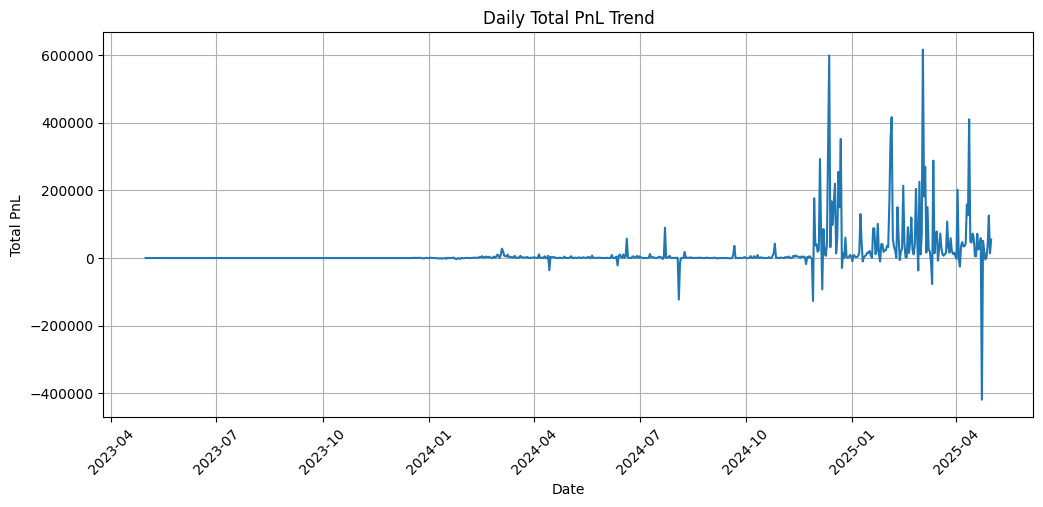

In [81]:
plt.figure(figsize=(12,5))
plt.plot(daily['trade_date'], daily['total_pnl'])
plt.xticks(rotation=45)
plt.title("Daily Total PnL Trend")
plt.xlabel("Date")
plt.ylabel("Total PnL")
plt.grid(True)
plt.show()


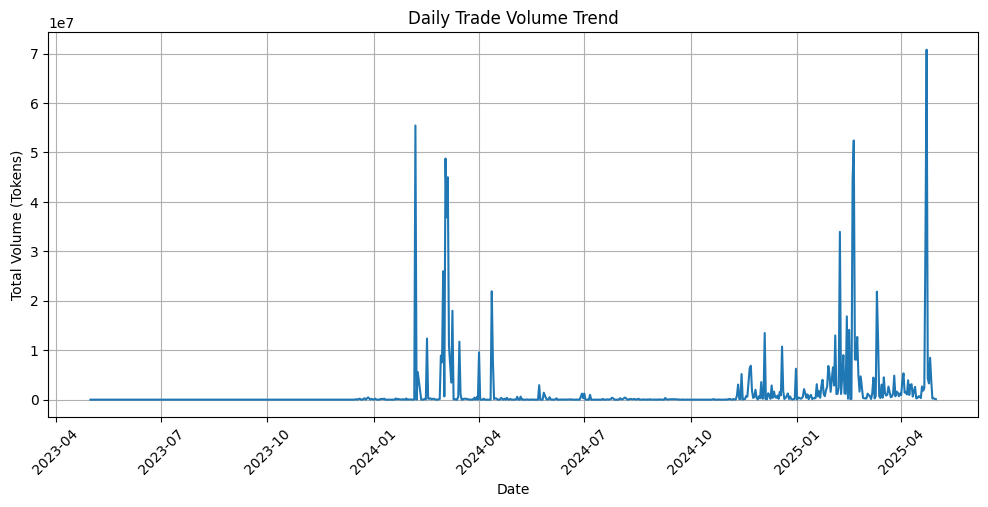

In [82]:
plt.figure(figsize=(12,5))
plt.plot(daily['trade_date'], daily['total_volume'])
plt.xticks(rotation=45)
plt.title("Daily Trade Volume Trend")
plt.xlabel("Date")
plt.ylabel("Total Volume (Tokens)")
plt.grid(True)
plt.show()


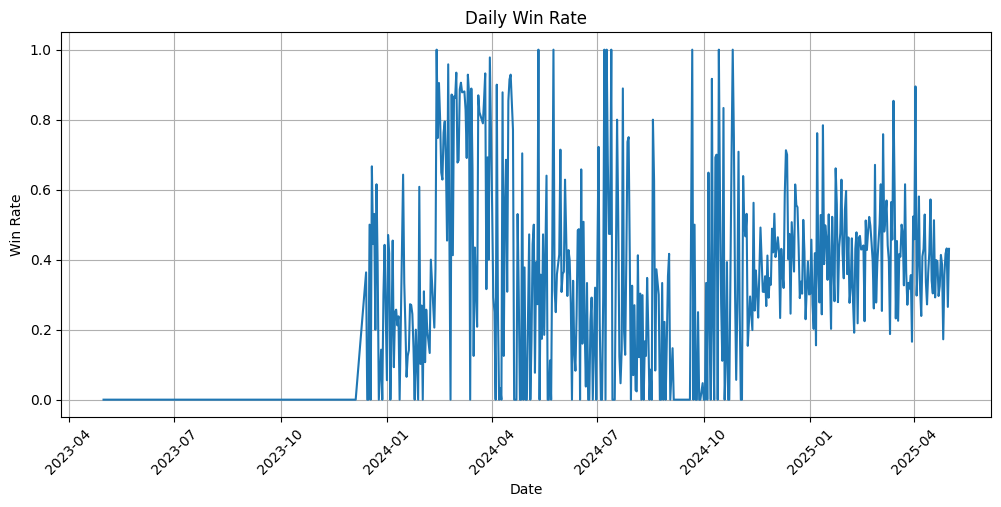

In [83]:
plt.figure(figsize=(12,5))
plt.plot(daily['trade_date'], daily['win_rate'])
plt.xticks(rotation=45)
plt.title("Daily Win Rate")
plt.xlabel("Date")
plt.ylabel("Win Rate")
plt.grid(True)
plt.show()


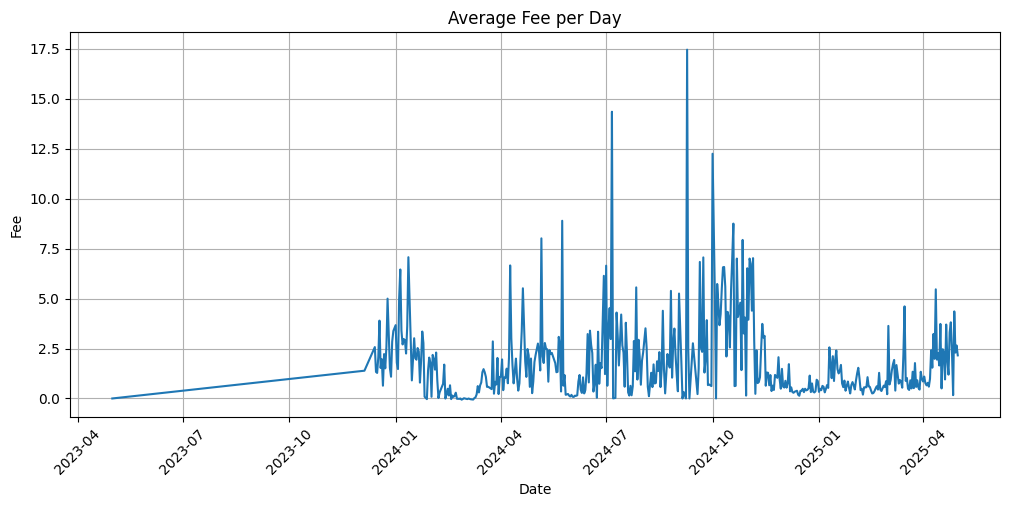

In [84]:
plt.figure(figsize=(12,5))
plt.plot(daily['trade_date'], daily['avg_fee'])
plt.xticks(rotation=45)
plt.title("Average Fee per Day")
plt.xlabel("Date")
plt.ylabel("Fee")
plt.grid(True)
plt.show()


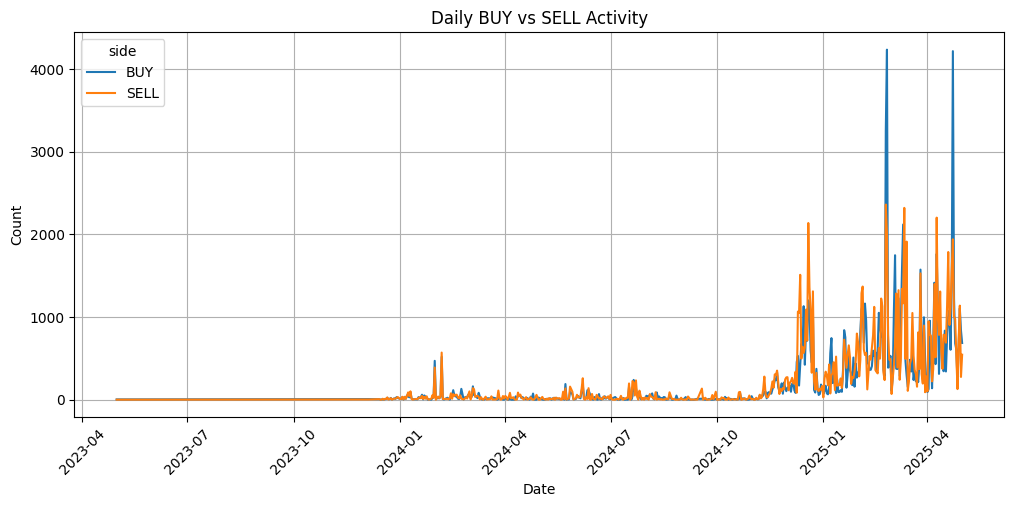

In [85]:
direction_daily = trades.groupby(['trade_date', 'side']).size().unstack(fill_value=0)

direction_daily.plot(kind='line', figsize=(12,5))
plt.title("Daily BUY vs SELL Activity")
plt.xlabel("Date")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


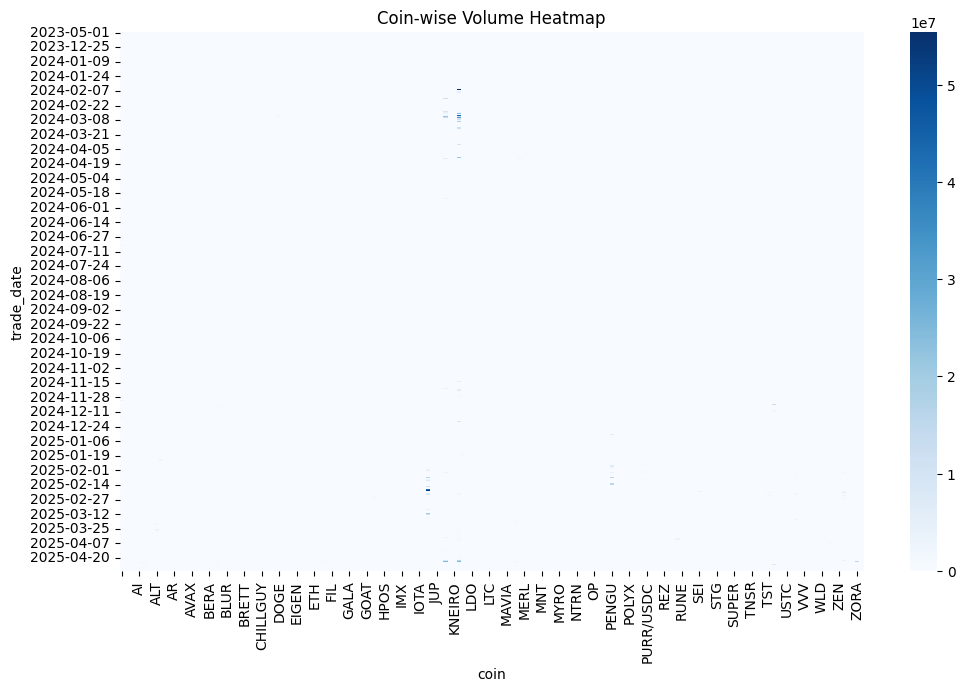

In [86]:
coin_heatmap = trades.pivot_table(
    index='trade_date',
    columns='coin',
    values='size_tokens',
    aggfunc='sum'
)

plt.figure(figsize=(12,7))
sns.heatmap(coin_heatmap.fillna(0), cmap="Blues")
plt.title("Coin-wise Volume Heatmap")
plt.show()


In [88]:
sentiment.columns = [c.strip().lower().replace(" ", "_") for c in sentiment.columns]
sentiment

,timestamp,value,classification,trade_date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05
...,...,...,...,...
2639,1745818200,54,Neutral,2025-04-28
2640,1745904600,60,Greed,2025-04-29
2641,1745991000,56,Greed,2025-04-30
2642,1746077400,53,Neutral,2025-05-01


In [92]:
sentiment = sentiment[['trade_date', 'value', 'classification']]

sentiment

,trade_date,value,classification
0,2018-02-01,30,Fear
1,2018-02-02,15,Extreme Fear
2,2018-02-03,40,Fear
3,2018-02-04,24,Extreme Fear
4,2018-02-05,11,Extreme Fear
...,...,...,...
2639,2025-04-28,54,Neutral
2640,2025-04-29,60,Greed
2641,2025-04-30,56,Greed
2642,2025-05-01,53,Neutral


In [93]:
merged = pd.merge(daily, sentiment, on='trade_date', how='left')
merged.head()


,trade_date,total_volume,total_usd_volume,number_of_trades,avg_execution_price,avg_start_position,avg_fee,total_pnl,win_rate,avg_notional,value,classification
0,2023-05-01,0.25130,477.00,3,1898.133333,0.091933,0.000000,0.000000,0.000000,158.997603,63.0,Greed
1,2023-12-05,11.80901,50005.83,9,11038.300000,2.513867,1.389051,0.000000,0.000000,5556.203241,75.0,Extreme Greed
2,2023-12-14,4092.28901,113203.35,11,8031.868818,-132.574302,2.572803,-205.434737,0.363636,10291.213225,72.0,Greed
3,2023-12-15,3558.00000,10609.95,2,2.982000,-2440.000000,1.326245,-24.632034,0.000000,5304.978000,70.0,Greed
4,2023-12-16,39897.00000,15348.77,3,0.384707,12124.666667,1.279063,0.000000,0.000000,5116.253793,67.0,Greed


In [94]:
merged_trades = pd.merge(trades, sentiment, on='trade_date', how='left')
merged_trades.head()


,account,coin,execution_price,size_tokens,size_usd,side,timestamp_ist,start_position,direction,closed_pnl,crossed,fee,timestamp,trade_date,profit_flag,abs_pnl,notional,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,buy,0.0,True,0.345404,NaT,2024-12-02,False,0.0,7872.163303,80.0,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,buy,0.0,True,0.005600,NaT,2024-12-02,False,0.0,127.680000,80.0,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,buy,0.0,True,0.050431,NaT,2024-12-02,False,0.0,1150.630695,80.0,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,buy,0.0,True,0.050043,NaT,2024-12-02,False,0.0,1142.038452,80.0,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,buy,0.0,True,0.003055,NaT,2024-12-02,False,0.0,69.747462,80.0,Extreme Greed


In [97]:
merged.groupby('classification')['total_pnl'].mean()
merged.groupby('classification')['total_volume'].mean()
merged[['value', 'total_pnl', 'win_rate', 'total_volume']].corr()




,value,total_pnl,win_rate,total_volume
value,1.000000,-0.082642,0.152485,0.039202
total_pnl,-0.082642,1.000000,0.170511,-0.051068
win_rate,0.152485,0.170511,1.000000,0.144267
total_volume,0.039202,-0.051068,0.144267,1.000000


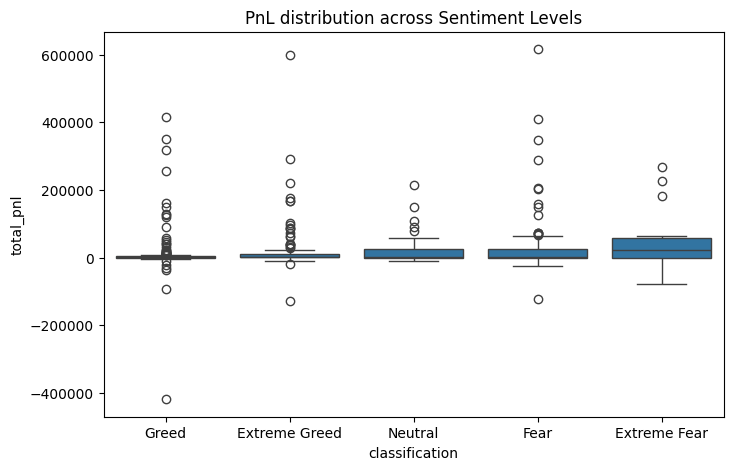

In [98]:

plt.figure(figsize=(8,5))
sns.boxplot(data=merged, x='classification', y='total_pnl')
plt.title("PnL distribution across Sentiment Levels")
plt.show()


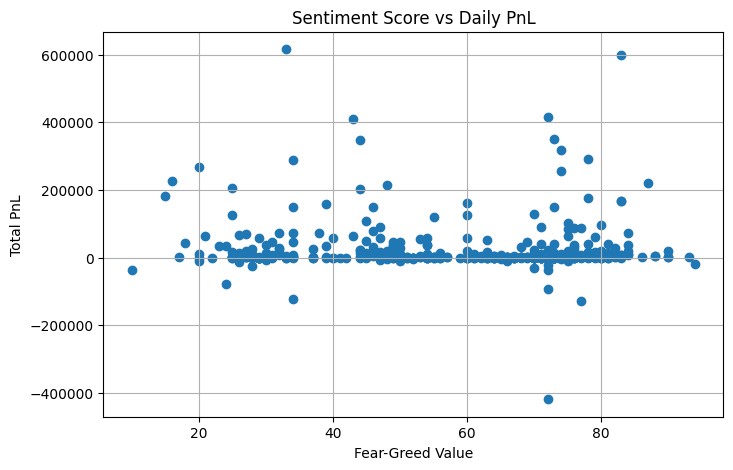

In [99]:
plt.figure(figsize=(8,5))
plt.scatter(merged['value'], merged['total_pnl'])
plt.xlabel("Fear-Greed Value")
plt.ylabel("Total PnL")
plt.title("Sentiment Score vs Daily PnL")
plt.grid(True)
plt.show()
